In [13]:
from util import get_image_by_index, decode_class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC

In [2]:
# Load the .npz file
data = np.load('dataset_features.npz')

# List all arrays within the .npz file
print(data.files)

# Access individual arrays by their names
X_train = data['trainset_features']
y_train = data['trainset_labels']

X_val = data['validset_features']
y_val = data['validset_labels']

X_test = data['testset_features']
y_test = data['testset_labels']

class_labels = data['class_labels']

['trainset_features', 'validset_features', 'testset_features', 'trainset_labels', 'validset_labels', 'testset_labels', 'class_labels']


In [3]:
# Create SVM with linear kernel
svc_linear = SVC(kernel='linear')

# Fit estimator
svc_linear.fit(X_train, decode_class(y_train))

SVC(kernel='linear')

In [4]:
print('Model Accuracy:')
accuracy = svc_linear.score(X_train, decode_class(y_train))
print(f'On train set: {accuracy:.3f}')
accuracy = svc_linear.score(X_val, decode_class(y_val))
print(f'On valid set: {accuracy:.3f}')
accuracy = svc_linear.score(X_test, decode_class(y_test))
print(f'On test  set: {accuracy:.3f}')

Model Accuracy:
On train set: 1.000
On valid set: 0.928
On test  set: 0.920


## SVM classifier with RBF kernel

In [14]:
# Create SVM with RBF kernel
svc_rbf = SVC(kernel='rbf', C=1, probability=True)

# Fit estimator
svc_rbf.fit(X_train, decode_class(y_train))

SVC(C=1, probability=True)

In [15]:
print('Model Accuracy:')
accuracy = svc_rbf.score(X_train, decode_class(y_train))
print(f'On train set: {accuracy:.3f}')
accuracy = svc_rbf.score(X_val, decode_class(y_val))
print(f'On valid set: {accuracy:.3f}')
accuracy = svc_rbf.score(X_test, decode_class(y_test))
print(f'On test  set: {accuracy:.3f}')

Model Accuracy:
On train set: 0.996
On valid set: 0.899
On test  set: 0.960


The classifier with the RBF kernel performs similarly to the one with the linear kernel. 

## Compute image probability

In [60]:
# Define image size and scaling
image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)  # Adjust rescaling if needed
test_images = datagen.flow_from_directory('./test', target_size=image_size, batch_size=batch_size, shuffle=False)

Found 50 images belonging to 6 classes.


In [80]:
random_indices = np.random.choice(test_images.n, 10, replace=False)  # Select 10 random indices  
probabilities = []

for idx in random_indices:
    image, label = get_image_by_index(test_images, idx)
    probabilities.append(svc_rbf.predict_proba(X_test[idx,:].reshape(1,-1))[0]) 

,bike,car,motorcycle,other,truck,van
0,0.006525,0.001791,0.985026,0.002945,0.002058,0.001654
1,0.014602,0.016456,0.011215,0.388571,0.545832,0.023323
2,0.005935,0.004236,0.978520,0.004533,0.004109,0.002668
3,0.011944,0.030718,0.010648,0.114580,0.036554,0.795556
4,0.009209,0.005058,0.966042,0.007589,0.008802,0.003300
5,0.993825,0.000996,0.000611,0.001687,0.001663,0.001219
6,0.023302,0.007943,0.025409,0.817908,0.122449,0.002988
7,0.001615,0.002206,0.990069,0.002129,0.002224,0.001757
8,0.989221,0.002261,0.001483,0.002174,0.002559,0.002300
9,0.005381,0.010906,0.005145,0.201573,0.771583,0.005412


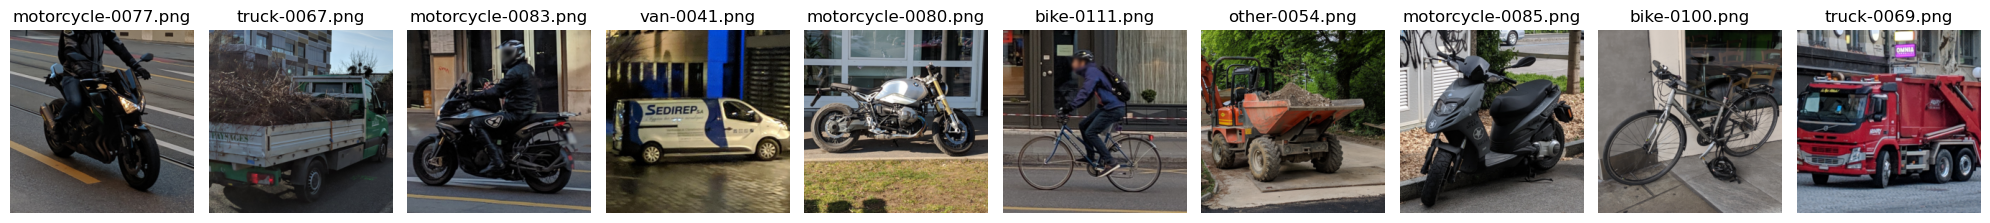

In [81]:
# Plot the images and probabilities
fig, axes = plt.subplots(1, 10, figsize=(20, 10))  # 2 rows, 5 columns
for k, idx in enumerate(random_indices):
    # Plot the image
    axes[k].imshow(get_image_by_index(test_images, idx)[0])  # Adjust reshape for image dimensions
    axes[k].set_title(test_images.filenames[idx].split('/')[1])
    axes[k].axis('off')

plt.tight_layout()

# Create a DataFrame to store probabilities and their corresponding categories
categories = class_labels  # Replace with actual category names if available
probs_df = pd.DataFrame(probabilities, columns=categories)
probs_df


## Regularization parameter C = 0.0001

In [82]:
# Create SVM with RBF kernel
svc_rbf = SVC(kernel='rbf', C=0.0001, probability=True)

# Fit estimator
svc_rbf.fit(X_train, decode_class(y_train))

probabilities = []
for idx in random_indices:
    image, label = get_image_by_index(test_images, idx)
    probabilities.append(svc_rbf.predict_proba(X_test[idx,:].reshape(1,-1))[0]) 

,bike,car,motorcycle,other,truck,van
0,0.085688,0.120560,0.534040,0.133847,0.083113,0.042751
1,0.006553,0.009967,0.008838,0.249446,0.623392,0.101805
2,0.086553,0.128315,0.520874,0.138286,0.085200,0.040773
3,0.002945,0.006210,0.003280,0.017387,0.031228,0.938951
4,0.070787,0.113261,0.502268,0.146904,0.122709,0.044072
5,0.478361,0.118293,0.071718,0.143593,0.116504,0.071531
6,0.006878,0.006609,0.017057,0.787336,0.173896,0.008224
7,0.061392,0.129193,0.533564,0.124788,0.098899,0.052165
8,0.471930,0.118137,0.075839,0.141609,0.115790,0.076695
9,0.001698,0.002499,0.002012,0.086028,0.891156,0.016607


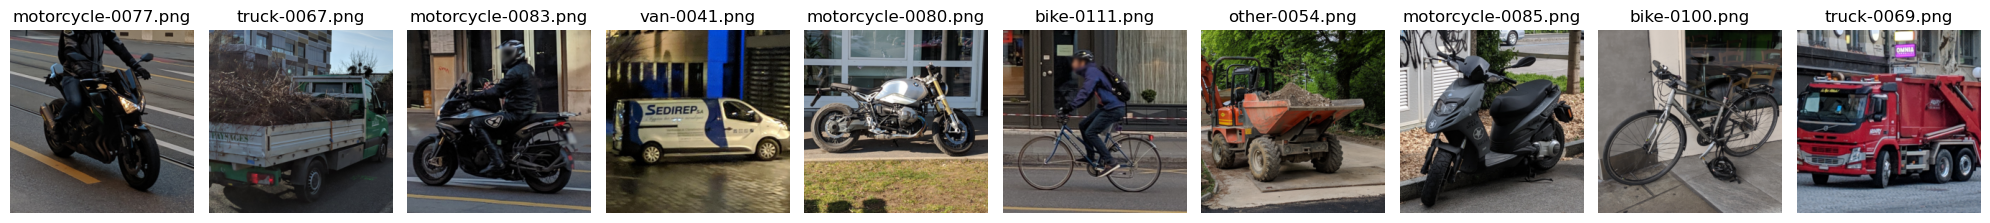

In [83]:
# Plot the images and probabilities
fig, axes = plt.subplots(1, 10, figsize=(20, 10))  # 2 rows, 5 columns
for k, idx in enumerate(random_indices):
    # Plot the image
    axes[k].imshow(get_image_by_index(test_images, idx)[0])  # Adjust reshape for image dimensions
    axes[k].set_title(test_images.filenames[idx].split('/')[1])
    axes[k].axis('off')

plt.tight_layout()

# Create a DataFrame to store probabilities and their corresponding categories
categories = class_labels  # Replace with actual category names if available
probs_df = pd.DataFrame(probabilities, columns=categories)
probs_df

## Regularization parameter C = 1000

In [84]:
# Create SVM with RBF kernel
svc_rbf = SVC(kernel='rbf', C=1000, probability=True)

# Fit estimator
svc_rbf.fit(X_train, decode_class(y_train))

probabilities = []
for idx in random_indices:
    image, label = get_image_by_index(test_images, idx)
    probabilities.append(svc_rbf.predict_proba(X_test[idx,:].reshape(1,-1))[0]) 

,bike,car,motorcycle,other,truck,van
0,0.006492,0.001810,0.984833,0.003184,0.001999,0.001682
1,0.014983,0.018745,0.011565,0.372455,0.554811,0.027441
2,0.005926,0.004312,0.978066,0.004967,0.004003,0.002726
3,0.010906,0.036502,0.009883,0.113701,0.034857,0.794150
4,0.009234,0.005159,0.965510,0.008193,0.008513,0.003391
5,0.993931,0.001129,0.000502,0.001685,0.001492,0.001260
6,0.020277,0.007069,0.020356,0.867355,0.082273,0.002670
7,0.001585,0.002239,0.989867,0.002348,0.002160,0.001800
8,0.989324,0.002490,0.001346,0.002101,0.002347,0.002393
9,0.005542,0.011798,0.005341,0.156796,0.814082,0.006440


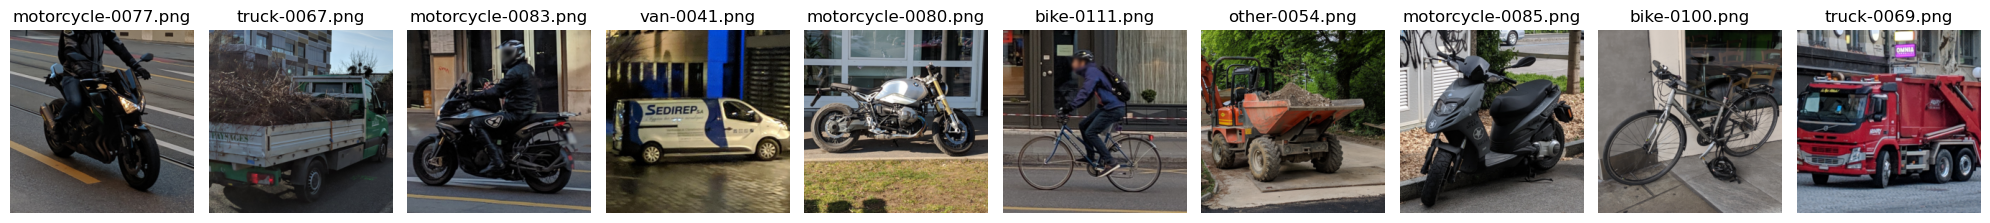

In [85]:
# Plot the images and probabilities
fig, axes = plt.subplots(1, 10, figsize=(20, 10))  # 2 rows, 5 columns
for k, idx in enumerate(random_indices):
    # Plot the image
    axes[k].imshow(get_image_by_index(test_images, idx)[0])  # Adjust reshape for image dimensions
    axes[k].set_title(test_images.filenames[idx].split('/')[1])
    axes[k].axis('off')

plt.tight_layout()

# Create a DataFrame to store probabilities and their corresponding categories
categories = class_labels  # Replace with actual category names if available
probs_df = pd.DataFrame(probabilities, columns=categories)
probs_df